# Scrublet pipeline 

In [1]:
!pip install scvi-tools
!pip install scikit-misc
!pip install scanpy
!pip install leidenalg

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.34.23 which is incompatible.



  Obtaining dependency information for scvi-tools from https://files.pythonhosted.org/packages/b7/79/c9e22e42b0a6d6b65e3291851641783379b04f541054ea1eed8486f57aa1/scvi_tools-1.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for anndata>=0.7.5 from https://files.pythonhosted.org/packages/24/d4/9f819dfdcf8aa0e8be1a042a9ef923ad31960182ace937627a00a295d7e2/anndata-0.10.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/89.6 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/89.6 kB ? eta -:--:--
     ----------------- -------------------- 41.0/89.6 kB 667.8 kB/s eta 0:00:01
     -------------------------------------- 89.6/89.6 kB 853.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for flax from https://files.pythonhosted.org/packages/95/a6/5017385e65dee7609250f1dc20c3874289afdf57212e65b7f26411c4313b/flax-0.7.5-py3-none-any.

  Obtaining dependency information for scikit-misc from https://files.pythonhosted.org/packages/86/32/568cb46ec933c7c71242f454bd87fc377af680b96db925903c94b166d988/scikit_misc-0.3.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB 393.8 kB/s eta 0:00:26
   - -------------------------------------- 0.3/10.0 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/10.0 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.0 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.0 MB 7.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.0 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.0 MB 7.0 MB/s eta 0:00:02
   ------------ -----------------

  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/64/a3/25727f99c7d9bb702d3a77a4431dc378745224bc96a8d5f295810213bf78/leidenalg-0.10.1-cp38-abi3-win_amd64.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/a1/ae/15db01b0343fa0833e0994bd4aa70ccb88cfb1c045f1cbfb0938fa81ef27/igraph-0.10.8-cp39-abi3-win_amd64.whl.metadata
  Obtaining dependency information for texttable>=1.6.2 from https://files.pythonhosted.org/packages/24/99/4772b8e00a136f3e01236de33b0efda31ee7077203ba5967fcc76da94d65/texttable-1.7.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.6 MB 3.0 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.6 MB 5.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.6 MB 7.1 

In [3]:
import scvi
import scanpy as sc
import pandas as pd

C:\Users\SKeam\AppData\Local\anaconda3\Lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
C:\Users\SKeam\AppData\Local\anaconda3\Lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [4]:
from matplotlib.pyplot import rc_context
sc.set_figure_params(dpi=100)

In [7]:
adata = sc.read_10x_h5('sample_filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()

C:\Users\SKeam\AppData\Local\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\SKeam\AppData\Local\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata

AnnData object with n_obs × n_vars = 8058 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [11]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 10)
sc.pp.highly_variable_genes(adata, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [12]:
adata

AnnData object with n_obs × n_vars = 7164 × 2971
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [13]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [14:24<00:00,  2.15s/it, v_num=1, train_loss_step=1.22e+3, train_loss_epoch=1.31e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:24<00:00,  2.16s/it, v_num=1, train_loss_step=1.22e+3, train_loss_epoch=1.31e+3]


In [14]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [02:27<00:00,  2.73it/s, v_num=1, train_loss_step=0.317, train_loss_epoch=0.237] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:27<00:00,  2.72it/s, v_num=1, train_loss_step=0.317, train_loss_epoch=0.237]


In [15]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df.index = df.index.map(lambda x: x[:-2])

df

,doublet,singlet,prediction
AAACCTGAGACTACAA,-8.762001,8.647360,singlet
AAACCTGAGACTCGGA,-4.286119,4.486574,singlet
AAACCTGAGCCTTGAT,-1.990368,2.084949,singlet
AAACCTGCAAGCGTAG,-0.184028,0.634566,singlet
AAACCTGCAGGGTATG,-0.660222,0.901888,singlet
...,...,...,...
TTTGTCAGTGCCTGTG,-1.000413,1.336064,singlet
TTTGTCAGTGCGATAG,-0.860370,1.878436,singlet
TTTGTCAGTTGATTCG,0.249129,-0.256233,doublet
TTTGTCAGTTGATTGC,0.306229,0.579398,singlet


In [16]:
len(df[df.prediction == 'doublet'])

1161

In [18]:
#THIS STEP IS NOT NECESSARY, just to visuallize results
adata.obs['prediction'] = df.prediction
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

C:\Users\SKeam\AppData\Local\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


StopIteration: 

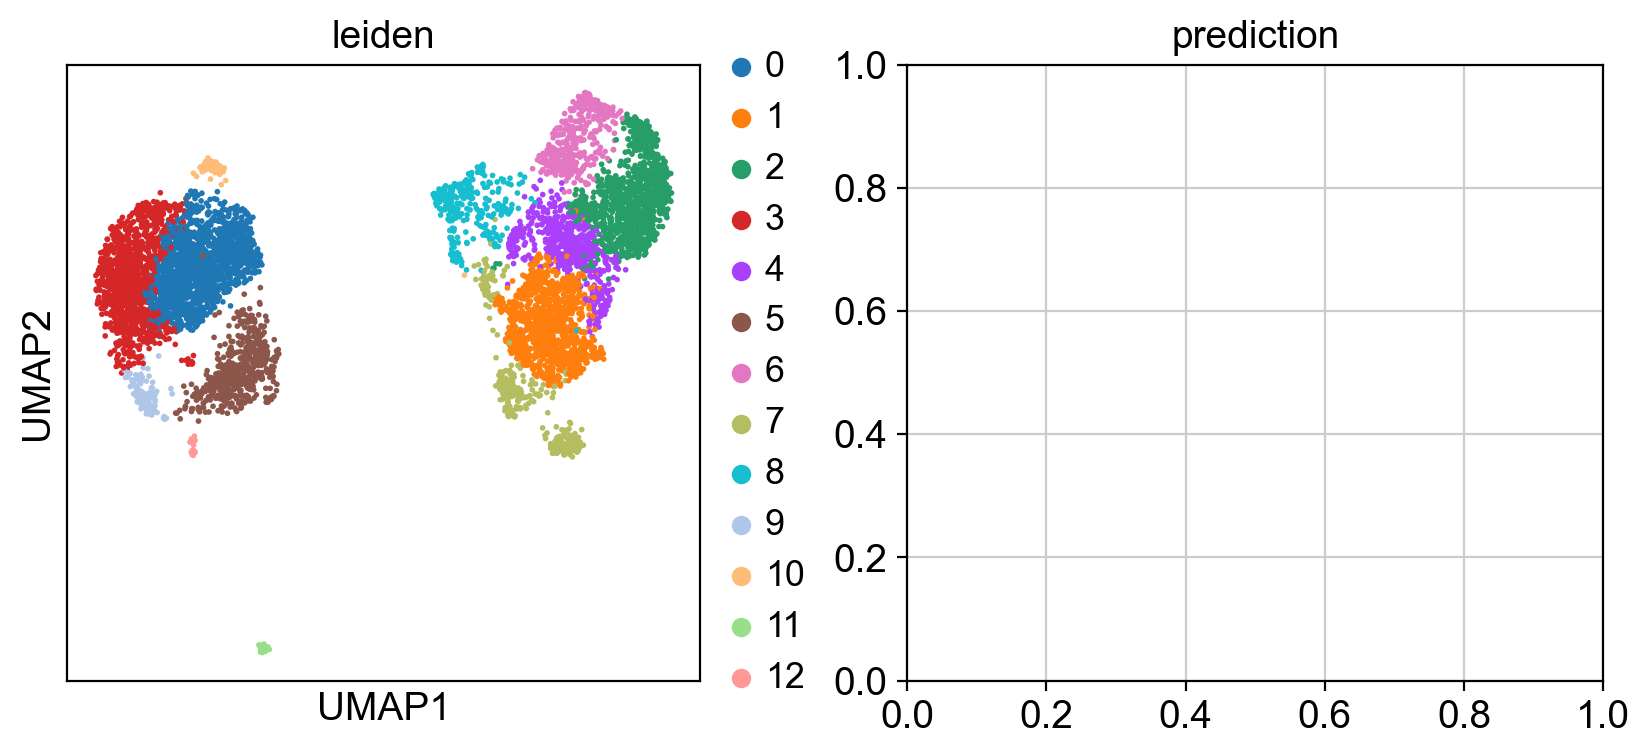

In [19]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color = ['leiden', 'prediction'])

In [1]:
 pip install umap-learn